# Convolutional Neural Network

Here we try to apply a convolutional neural network to predictions of user churn. 

## Preparing the data

Prepare the data for input into Keras.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def prepare_df(df,date_feature, group_array,start_date,end_date):

    # Convert to datetime format
    df[date_feature] = pd.to_datetime(df[date_feature])

    # Select data from dates according to start_date and end_date
    df = df[df[date_feature]>= pd.to_datetime(start_date)]
    df = df[df[date_feature]<= pd.to_datetime(end_date)]

    # Group according to categories
    df_grp = df.groupby(group_array).count();

    # Unpack the indices into columns
    df_grp = df_grp.xs(date_feature, axis=1, drop_level=True)
    df_grp = df_grp.unstack().fillna(0)
  
    # Return the dataframe
    return df_grp

In [141]:
# Inputs
source_csv = '/home/work/GitHub/data/teacher_timeseries.csv'
source_user = '/home/work/GitHub/data/user_info.csv'

# Reading dataframes
df = pd.read_csv(source_csv)
df_user = pd.read_csv(source_user)

df.head()

,Unnamed: 0,user_id,event_type,date_of_event
0,0,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,q_lvl_4_cor,2015-12-09 22:06:35.997
1,1,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,q_lvl_4,2015-12-09 22:07:28.978
2,2,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,view_hint,2015-12-09 22:07:37.847
3,3,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,view_hint,2015-12-09 22:07:43.401
4,4,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,view_hint,2015-12-09 22:07:46.617


In [142]:
# Remove 'Unnamed' columns
df = df.drop('Unnamed: 0',axis=1)
df_user = df_user.drop('Unnamed: 0',axis=1)

# Join user data to the main dataframe
df_new = df.set_index('user_id').join(df_user.set_index('id')['registration_date'])

# Discretise (set time window)
dt = 7*24*3600
df_new['event_leg'] = np.floor((pd.to_datetime(df_new['date_of_event']) - pd.to_datetime(df_new['registration_date'])).dt.total_seconds()/dt)

# Group and create a new multi index dataframe  
start_date = '2014-08-01'
end_date = '2017-05-01'

df_grp = prepare_df(df_new.drop('registration_date').reset_index(),'date_of_event',['index','event_leg','event_type'],start_date,end_date)
df_grp.head()

event_type                                                    add_assig  \
index                                              event_leg              
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0             0.0   
                                                    0.0             0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0             0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0             0.0   
                                                    0.0             0.0   

event_type                                                    add_custom_assig  \
index                                              event_leg                     
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0                    0.0   
                                                    0.0                    0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0                    0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0                    0.0   
                                                    0.0                    0.0   

event_type                                                    add_user  \
index                                              event_leg             
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0            0.0   
                                                    0.0            0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0            0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0            0.0   
                                                    0.0            0.0   

event_type                                                    create_group  \
index                                              event_leg                 
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0                0.0   
                                                    0.0                0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0                0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0                0.0   
                                                    0.0                0.0   

event_type                                                    play_video  \
index                                              event_leg               
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0              0.0   
                                                    0.0              0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0              0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0              0.0   
                                                    0.0              8.0   

event_type                                                    q_lvl_0  \
index                                              event_leg            
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0           0.0   
                                                    0.0           0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0           0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0           0.0   
                                                    0.0           0.0   

event_type                                                    q_lvl_0_cor  \
index                                              event_leg                
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0               0.0   
                                                    0.0               0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0               0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... -1.0               0.0   
                                                    0.0               0.0   

event_type                                                    q_lvl_1  \
index                                              event_leg            
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0           0.0   
                             

In [143]:
## Add the events of event_leg -1 to 0

# Change the -1 event to 0
df_new = df_grp[df_grp.index.get_level_values(1)<0].reset_index()
df_new['event_leg'] = 0

# Add the dataframes together
df = df_grp.add(df_new.set_index(['index','event_leg']),fill_value=0)

# Removing event_leg = -1
df = df[df.index.get_level_values(1)>= 0]

# Save the csv
df.to_csv('/home/work/GitHub/data/teacher_churn/edit_teacher_timeseries_week.csv')

df.head()

event_type                                                    add_assig  \
index                                              event_leg              
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0              0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0              0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0              0.0   
                                                   2.0              0.0   
                                                   6.0              0.0   

event_type                                                    add_custom_assig  \
index                                              event_leg                     
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0                     0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0                     0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0                     0.0   
                                                   2.0                     0.0   
                                                   6.0                     0.0   

event_type                                                    add_user  \
index                                              event_leg             
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0             0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0             0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0             0.0   
                                                   2.0             0.0   
                                                   6.0             0.0   

event_type                                                    create_group  \
index                                              event_leg                 
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0                 0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0                 0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0                 0.0   
                                                   2.0                 0.0   
                                                   6.0                 0.0   

event_type                                                    play_video  \
index                                              event_leg               
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0               0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0               0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0               8.0   
                                                   2.0               0.0   
                                                   6.0               1.0   

event_type                                                    q_lvl_0  \
index                                              event_leg            
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0            0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0            0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0            0.0   
                                                   2.0            0.0   
                                                   6.0            0.0   

event_type                                                    q_lvl_0_cor  \
index                                              event_leg                
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0                0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d... 0.0                0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0                0.0   
                                                   2.0                0.0   
                                                   6.0                0.0   

event_type                                                    q_lvl_1  \
index                                              event_leg            
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... 0.0            0.0   
0018d184ff3b1f2336ebeac5646d1

In [144]:
# Find users that have churned
plot_churn = df.reset_index().groupby('index')['event_leg'].max()

Histogram


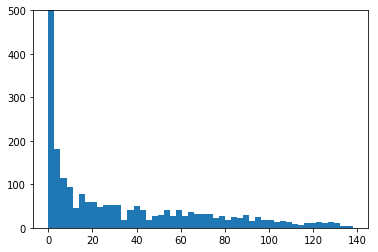

In [151]:
plt.hist(plot_churn,bins=50)
plt.ylim([0,500])
print('Histogram')



In [152]:
last_day = 4;
cut_off = 8;

# Find users that have churned
plot_churn = df.reset_index().groupby('index')['event_leg'].max()

# Remove users that have churned before last month
plot_churn = plot_churn[plot_churn.values >= last_day]
df_lm = df.reset_index().set_index(['index','event_leg']).loc[plot_churn.index.values]

# Remove rows all greater than last_month
df_lm = df_lm[df_lm.index.get_level_values(1)<=last_day]
plot_churn =plot_churn.loc[np.unique(df_lm.index.get_level_values(0).values)]

# Label those that churned at last month
label = []

for item in plot_churn.values:
    
    if item >= last_day and item < cut_off:
        label.append(1)
        
    else:
        label.append(0)


df_lm = df_lm.loc[plot_churn.index.values]

# CLean off any nan
df_lm = df_lm.fillna(0)

# Add rows for months that may not exist for a user and set as zero
df_lm = df_lm.unstack(level='event_leg').stack(level='event_leg',dropna=False).fillna(0)

# Display the dataframe
df_lm.head(10)

event_type                                                    add_assig  \
index                                              event_leg              
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   
00ab0f1d045f05764b9731a67758d9b401c234ffe7b5de8... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   

event_type                                                    add_custom_assig  \
index                                              event_leg                     
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   
00ab0f1d045f05764b9731a67758d9b401c234ffe7b5de8... 0.0                     3.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   

event_type                                                    add_user  \
index                                              event_leg             
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0             0.0   
                                                   1.0             0.0   
                                                   2.0             0.0   
                                                   3.0             0.0   
                                                   4.0             0.0   
00ab0f1d045f05764b9731a67758d9b401c234ffe7b5de8... 0.0             1.0   
                                                   1.0             3.0   
                                                   2.0             6.0   
                                                   3.0             0.0   
                                                   4.0             0.0   

event_type                                                    create_group  \
index                                              event_leg                 
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   
00ab0f1d045f05764b9731a67758d9b401c234ffe7b5de8... 0.0                 1.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   

event_type                                                    play_video  \
index                                              event_leg               
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c... 0.0               8.0   
                                                   1.0      

(array([ 1116.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   178.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

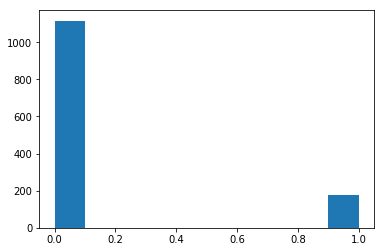

In [153]:
plt.hist(label)

Profile of teachers that have churned


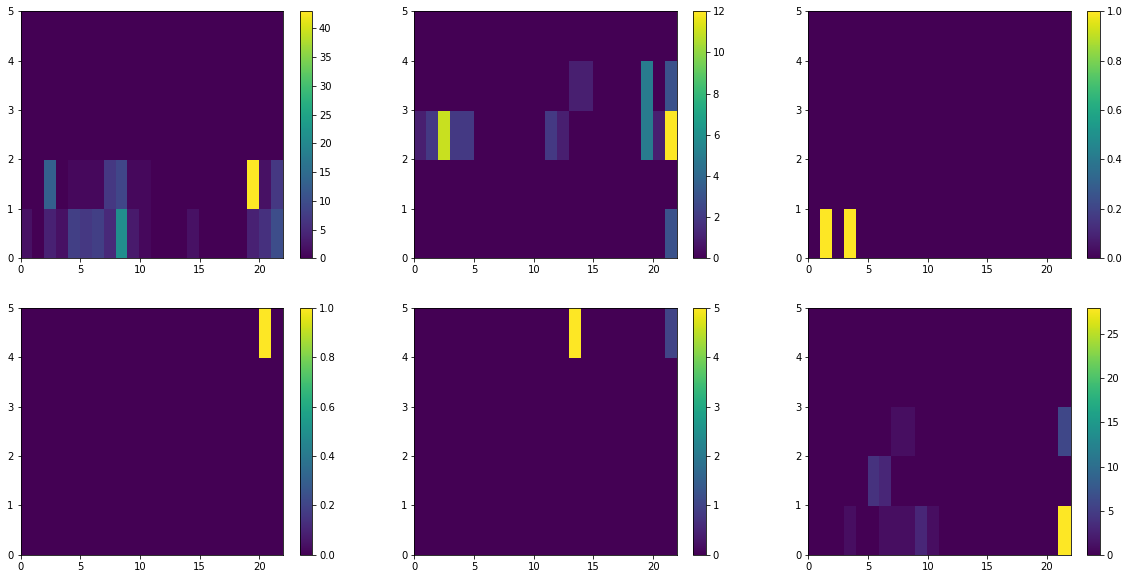

In [158]:
import random

users=np.unique(df_lm.index.get_level_values(0))

indices_1 = [i for i,x in enumerate(label) if x == 1]
indices_0 = [i for i,x in enumerate(label) if x == 0]

plt.subplots(2,3, figsize=(20,10))

it = 1;
print('Profile of teachers that have churned')
for item in random.sample(indices_1,6):

    plt.subplot(2,3,it)
    plt.pcolor(df_lm[df_lm.index.get_level_values(0)==users[item]])
    plt.colorbar()
    #plt.show()
    it += 1


Profile of teachers that have remained


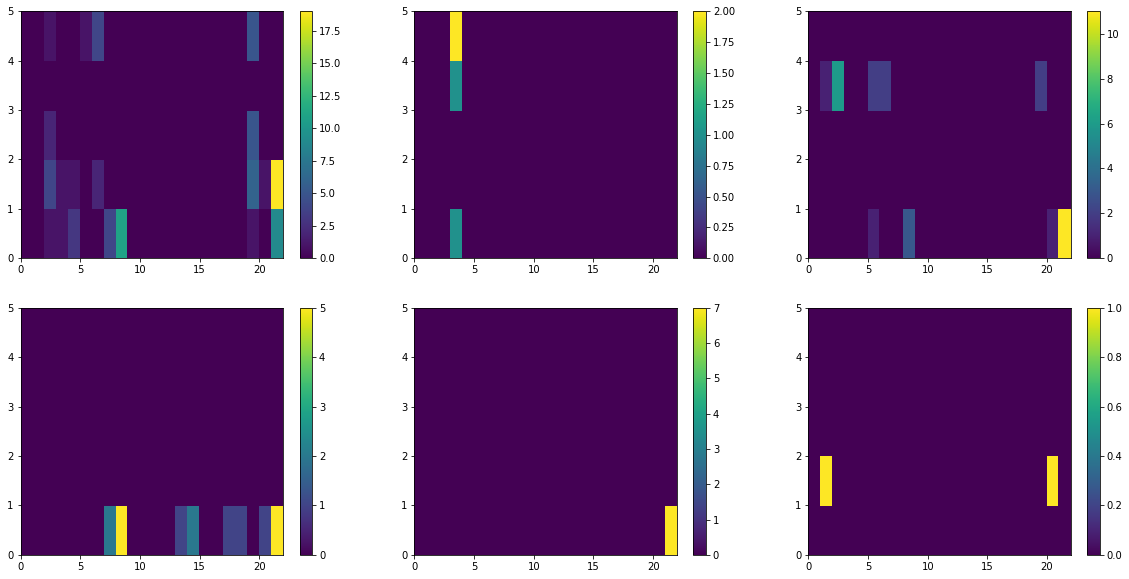

In [159]:
plt.subplots(2,3, figsize=(20,10))
it = 1;
print('Profile of teachers that have remained')
for item in random.sample(indices_0,6):

    plt.subplot(2,3,it)
    plt.pcolor(df_lm[df_lm.index.get_level_values(0)==users[item]])
    plt.colorbar()
    it += 1